In [1]:
#Se cargan las librerias necesarias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Se leen los datos en Python
datos = pd.read_csv('C:/Users/tonch/OneDrive/Escritorio/T Edna/Future50.csv')

In [3]:
#Ver tres primeras filas
datos.head(3)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes


In [4]:
datos

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [5]:
#Se miran los datos que interesan
datos[['Sales','Units']].head()

,Sales,Units
0,24,26
1,44,105
2,21,21
3,25,46
4,49,50


<Axes: xlabel='Sales', ylabel='Units'>

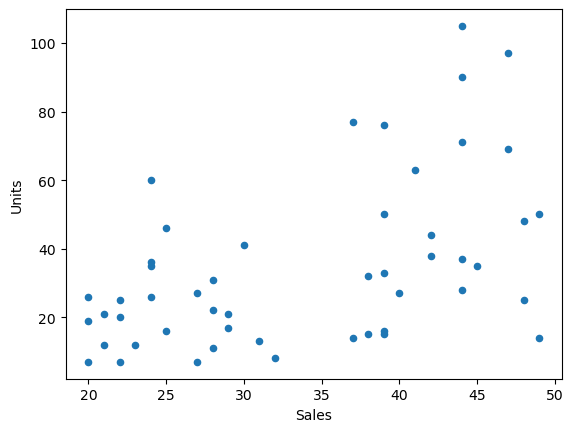

In [6]:
#Se grafican los datos que interesan
datos[['Sales','Units']].plot.scatter(x='Sales',y='Units')

In [7]:
# pruebas de parametro
# datos de regresión lineal
# interceccion (b): [-8.827331593013326]
# pendiente (w): [1.28855333]
w = 1.28
b = -8.8

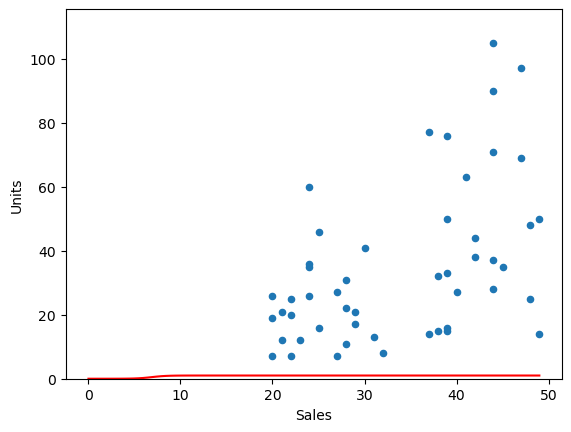

In [10]:
# puntos de la recta
x = np.linspace(0,datos['Sales'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
datos.plot.scatter(x='Sales',y='Units')
plt.plot(x, y, '-r')
plt.ylim(0,datos['Units'].max()*1.1)
# plt.grid()
plt.show()

In [16]:
# calculo de las predicciones
datos['sigmoid'] = 1/(1+np.exp(-(datos['Sales']*w+b)))

In [20]:
# calculo de la funcion de error
datos['loss_xi'] = -datos['Units']*np.log(datos['sigmoid'])-(1-datos['Units'])*np.log(1-datos['sigmoid'])
cost_j = datos['loss_xi'].mean()
cost_j

-inf

In [21]:
#Se hace un dataframe para calcular el error en funcion de los parametros w, b

array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

#Se redondeapara solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [22]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [23]:
def sum_error_df(df):
    datos['sigmoid'] = 1/(1+np.exp(-(datos['Sales']*df['w']+df['b'])))
    datos['loss_xi'] = -datos['Units']*np.log(datos['sigmoid'])-(1-datos['Units'])*np.log(1-datos['sigmoid'])
    j_cost = datos['loss_xi'].mean()
    return(j_cost)

In [24]:
df['error'] = df.apply(sum_error_df, axis=1)

In [25]:
df.sort_values(by=['error']).head()

,w,b,error
999,0.14,-3.01,-73.936832
998,0.14,-3.02,-73.597616
997,0.14,-3.03,-73.258385
996,0.14,-3.04,-72.919141
995,0.14,-3.05,-72.579882


In [26]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [27]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,74.480999,74.134982,73.788973,73.442973,73.096982,72.751000,72.405027,72.059064,71.713109,71.367163,...,43.383134,43.038209,42.693298,42.348404,42.003526,41.658665,41.313819,40.968990,40.624177,40.279380
0.06,61.640332,61.294688,60.949056,60.603435,60.257826,59.912228,59.566642,59.221068,58.875505,58.529955,...,30.587277,30.242977,29.898696,29.554434,29.210190,28.865965,28.521759,28.177572,27.833403,27.489254
0.07,48.816494,48.471328,48.126176,47.781039,47.435916,47.090807,46.745712,46.400632,46.055567,45.710516,...,17.817109,17.473514,17.129939,16.786385,16.442851,16.099338,15.755846,15.412374,15.068923,14.725493
0.08,36.013568,35.668980,35.324407,34.979852,34.635313,34.290791,33.946286,33.601798,33.257327,32.912873,...,5.074569,4.731715,4.388883,4.046072,3.703282,3.360513,3.017766,2.675040,2.332336,1.989654
0.09,23.234938,22.891002,22.547084,22.203186,21.859305,21.515444,21.171601,20.827777,20.483971,20.140185,...,-7.640319,-7.982439,-8.324538,-8.666616,-9.008673,-9.350708,-9.692723,-10.034716,-10.376689,-10.718640


In [28]:
#Importar librerias para realizar graficos 3D
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

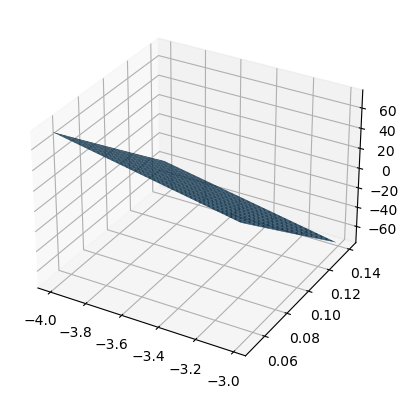

In [29]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

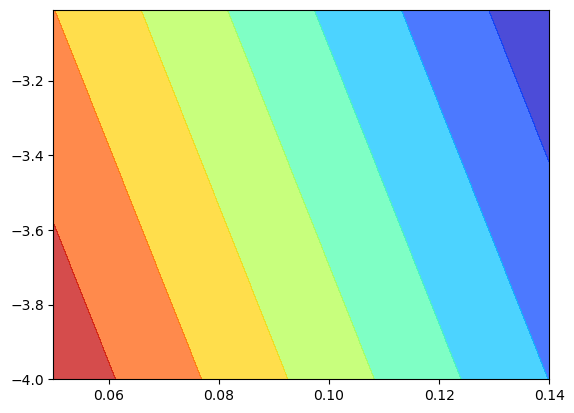

In [30]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [31]:
def delta_j_w(w, b):
    datos['sigmoid'] = 1/(1+np.exp(-(datos['Sales']*w+b)))
    datos['partial_loss'] = (datos['sigmoid']-datos['Units'])*datos['Sales']
    derivative = datos['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    datos['sigmoid'] = 1/(1+np.exp(-(datos['Sales']*w+b)))
    datos['partial_loss'] = (datos['sigmoid']-datos['Units'])
    derivative = datos['partial_loss'].mean()
    return(derivative) 

In [32]:
# valores optimos de sklearn (más abajo la explicación)
# w = 1.28855333
# b = -8.827331593013326
w_0 = 1.28
b_0 = -8.8

In [33]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

2.5346800000788225 -5.429999999611953
